In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import pandas as pd
import numpy as np


#EDA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기

In [3]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. 데이터 확인

## 2-1. 데이터 구조 확인

In [4]:
# 데이터 기기
df.shape

(7043, 21)

In [5]:
# col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# 문자형
df.describe(include=['object']).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
# 숫자형
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
### TotalCharges 는 object인데 int로 바꿔야함
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 

# 3. EDA

## 3-1. 결측치 확인

### 3-1-1. 결측치 갯수 확인

In [9]:
df.isnull().sum()
## 결측치 없음

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 3-1-2. 결측치 비율 확인
- ~ 5% : 결측치 삭제(or 대체)
- 5~30% : 결측치 대체 KNN Imputation, MICE
- 50% ~ : 해당 col 제거 고려

In [10]:
# 전체 행
row = len(df)

# 결측치 개수 / 전체 행 수 * 100
(df.isnull().sum() / row) * 100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [11]:
## 결측치 10%이므로 대체하겠음
df['TotalCharges'].fillna(0, inplace=True) ## 결측치 0으로 채우기

/tmp/ipykernel_37/2428821655.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True) ## 결측치 0으로 채우기


## 3-2. 이상치
- 수치형

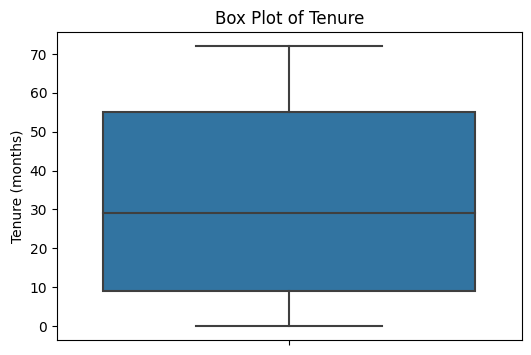

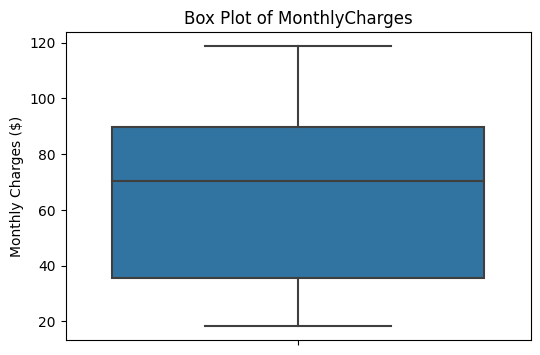

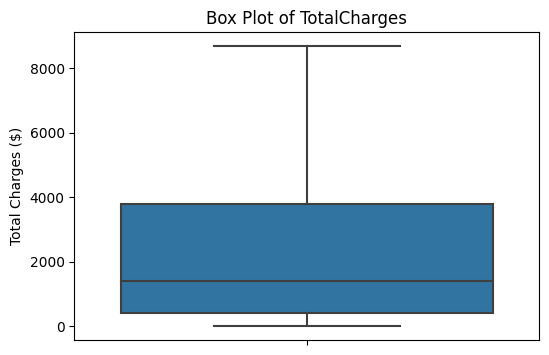

In [12]:
# 수치형 변수
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['tenure'])
plt.title('Box Plot of Tenure')
plt.ylabel('Tenure (months)')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['MonthlyCharges'])
plt.title('Box Plot of MonthlyCharges')
plt.ylabel('Monthly Charges ($)')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['TotalCharges'])
plt.title('Box Plot of TotalCharges')
plt.ylabel('Total Charges ($)')
plt.show()

## 이상치 없음

In [13]:
## 숫자로 확인
## IQR을 벗어나는 이상치 개수 확인
def outlier(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
 
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"{lower:.2f}, {upper:.2f}")
    print(f"총 이상치 개수: {len(outliers)}")
    
    return len(outliers)


numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

for col in numerical_cols:
    outlier(df, col)

Q1: 9.00, Q3: 55.00, IQR: 46.00
-60.00, 124.00
총 이상치 개수: 0
Q1: 35.50, Q3: 89.85, IQR: 54.35
-46.02, 171.38
총 이상치 개수: 0
Q1: 398.55, Q3: 3786.60, IQR: 3388.05
-4683.52, 8868.67
총 이상치 개수: 0


## 3-3. 피처값 확인
- 범주형

In [14]:
# customerID 제외, Churn은 타겟변수
categorical_cols = df.select_dtypes(include='object').columns.tolist()
cols_to_exclude = ['customerID', 'Churn']
categorical_features = [col for col in categorical_cols if col not in cols_to_exclude]


for col in categorical_features:
    print(df[col].value_counts(normalize=True))
    print('고유값')
    print(df[col].nunique())

# 클래스 불균형
## Dependents, PhoneService, MultipleLines

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64
고유값
2
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64
고유값
2
Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64
고유값
2
PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64
고유값
2
MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64
고유값
3
InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64
고유값
3
OnlineSecurity
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: proportion, dtype: float64
고유값
3
OnlineBackup
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: proportion, dtype: float64
고유값
3
DeviceProtection
No                     0.439443
Yes                    0.343888
No internet service    0.

## 3-4. 기술통계량

### 3-4-1. 범주형

In [15]:
print(df.describe(include='object').T)

                 count unique               top  freq
customerID        7043   7043        7590-VHVEG     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
Churn             7043      2                No  5174


### 3-4-2. 수치형

In [16]:
print(df.describe())
# 최빈값
print('최빈값')
print(df[numerical_cols].mode().iloc[0])

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000
최빈값
tenure             1.00
MonthlyCharges    20.05
TotalCharges       0.00
Name: 0, dtype: float64


# 4. 전처리

## 4-1. 결측치 처리

In [17]:
# 평균값으로 대체
df1 = df.fillna(df["TotalCharges"].mean())

## 4-2. 이상치 처리

In [ ]:
### 해당 데이터는 이상치 없음

## 4-3. 인코딩

In [18]:
## 고객 아이디는 고유값이니까 제외
df1 = df1.drop(columns = ['customerID'])

### 4-3-1. 범주형

In [19]:
## 범주가 2개 (yes,no) - 라벨 인코딩

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

yes_no_mapping = {'Yes': 1, 'No': 0}
for col in binary_cols:
    if col != 'gender':
        df1[col] = df1[col].map(yes_no_mapping)
df1['gender'] = df1['gender'].map({'Female': 1, 'Male': 0})


df1[binary_cols].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,1,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,1,1,1
3,0,0,0,0,0,0
4,1,0,0,1,1,1


In [20]:
## 범주가 3개 () - 원핫 인코딩
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


df1 = pd.get_dummies(df1, columns=multi_cols, drop_first=True, dtype=int)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


### 4-3-2. 수치형

In [21]:
### StandardScale
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df1[numerical_cols] = ss.fit_transform(df1[numerical_cols])

print(df1[numerical_cols].head().applymap('{:.4f}'.format))

    tenure MonthlyCharges TotalCharges
0  -1.2774        -1.1603      -0.9926
1   0.0663        -0.2596      -0.1722
2  -1.2367        -0.3627      -0.9581
3   0.5143        -0.7465      -0.1937
4  -1.2367         0.1974      -0.9389


/tmp/ipykernel_37/1209753325.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df1[numerical_cols].head().applymap('{:.4f}'.format))


# 5. 데이터셋 분리

In [22]:
X = df1.drop(columns = ['Churn'])
y = df1['Churn'].values

## 테스트 데이터 셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y,random_state=42)

# 6. 모델링

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(random_state=42), ### svc - probability = True : 분류가 속할 확률 반환
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [24]:
## 튜닝 전 모델 학습 및 성능 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []


for name, model in models.items():
    
    # 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 성능 평가
    
    # 나눗셈 오류 발생 시 0으로 리리
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # AUC - 확률 예측
    roc_auc = 'N/A'
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        
    # 결과
    results.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4),
        'AUC-ROC': round(roc_auc, 4) if isinstance(roc_auc, float) else roc_auc
    })

comparison_df = pd.DataFrame(results).set_index('Model').sort_values(by='F1 Score', ascending=False)
print(comparison_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4656
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 6338, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265383 -> initscore=-1.018173
[LightGBM] [Info] Start training from score -1.018173
                           Accuracy  Precision  Recall  F1 Score AUC-ROC
Model                                                                   
Logistic Regression          0.8156     0.6993  0.5348    0.6061  0.8529
LightGBM                     0.8142     0.6944  0.5348    0.6042  0.8438
Gradient Boosting            0.8156     0.7111  0.5134    0.5963  0.8511
G

In [25]:
### 지표를 종합적으로 봤을 때 - 3개가 가장 성능 좋음
## Logistic Regression,  LightGBM, Gradient Boosting

- 궁금증 : 고객 이탈 분류에서는 어떤 지표를 고려하는 것이 좋을까?

# 7. 하이퍼파리미터 튜닝
- Logistic Regression ( 하이퍼 파라미터 수 적음)
- Optuna :LightGBM, Gradient Boosting ( 하이퍼 파라미터 수 많음)

궁금증 : autoML 쓰면 안되나...?

## 7-1. 그리드 서치
- 로지스틱 회귀

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [27]:
# 그리드 정의
param_grid = [
    {
        'penalty': ['l1', 'l2'], 
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'], ## l1, l2 규제 모두 지원
        'max_iter': [1000]
    },
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs'], # l2 규제만 지원
        'max_iter': [1000]
    }
]

# 학습
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5, # 5-fold
    verbose=2, # 학습 과정 출력
    n_jobs=-1 # 모두 사용
)

grid_search.fit(X_train, y_train)

# 결과
print(f"최적 f1: {grid_search.best_score_:.4f}")
print(grid_search.best_params_)


lr = grid_search.best_estimator_

# 1. 테스트 데이터(X_test)로 예측 수행
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

# 2. 최종 성능 평가
lr_f1 = f1_score(y_test, y_pred)
lr_auc = roc_auc_score(y_test, y_proba)
lr_recall = recall_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)

print(f"f1 Score: {lr_f1:.4f}")
print(f"AUC-ROC: {lr_auc:.4f}")
print(f"recall: {lr_recall:.4f}")
print(f"precision: {lr_precision:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

최적 f1: 0.5973
{'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
f1 Score: 0.5988
AUC-ROC: 0.8519
recall: 0.5348
precision: 0.6803


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 7-2. Optuna
- LightGBM, Gradient Boosting

In [28]:
!pip install optuna

In [31]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
# ----- 하이퍼 파리미터 튜닝 ----
def optuna_lgbm(check):
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'n_estimators': check.suggest_int('n_estimators', 100, 500), 
        'learning_rate': check.suggest_float('learning_rate', 1e-3, 0.1, log=True), 
        'max_depth': check.suggest_int('max_depth', 3, 8),
        'num_leaves': check.suggest_int('num_leaves', 10, 50),
        'min_child_samples': check.suggest_int('min_child_samples', 20, 100),
        'subsample': check.suggest_float('subsample', 0.5, 1.0), 
        'colsample_bytree': check.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': check.suggest_float('reg_alpha', 1e-8, 10.0, log=True), 
        'reg_lambda': check.suggest_float('reg_lambda', 1e-8, 10.0, log=True), 
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = LGBMClassifier(**param)
    
    # k-fold로 성능 평가
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # f1 최대값 계산
    score = cross_val_score(model, X_train, y_train, 
                            cv=kf, scoring='f1', n_jobs=-1)
    
    # f1 평균
    return np.mean(score) * (-1)

# 함수 학습
study = optuna.create_study(direction='minimize', study_name='LGBM_Churn_Optimization') 
# direction='minimize' :-F1 Score을 최소화하도록 설정하는 것

# 최적화
study.optimize(optuna_lgbm, n_trials=30, show_progress_bar=True)
# n_trials: 시도 횟수 - 캐글에서 용량 초과라 일단 30번만 하겠음


# 결과
print(f"최적 f1 score: {-study.best_value:.4f}")
print(study.best_params)


# ----- 하이퍼파리미터 튜닝 모델 적용 ---

best_param = study.best_params

# 모델링
lgbm = LGBMClassifier(**best_param, random_state=42) 

# 학습
lgbm.fit(X_train, y_train)

# 예측
y_pred = lgbm.predict(X_test)
y_proba = lgbm.predict_proba(X_test)[:, 1]

# 성능 평가
lgbm_f1 = f1_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_proba)
lgbm_recall = recall_score(y_test, y_pred)
lgbm_precision = precision_score(y_test, y_pred)

print(f"f1 Score: {lgbm_f1:.4f}")
print(f"AUC-ROC: {lgbm_auc:.4f}")
print(f"recall: {lgbm_recall:.4f}")
print(f"Precision: {lgbm_precision:.4f}")

[I 2025-10-12 07:47:20,493] A new study created in memory with name: LGBM_Churn_Optimization


  0%|          | 0/30 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1345, number of negative: 3725
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.128850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265286 -> initscore=-1.018673
[LightGBM] [Info] Start training from score -1.018673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
# 함수 정의
def optuna_gbc(check):
    param = {
        'n_estimators': check.suggest_int('n_estimators', 100, 500), 
        'learning_rate': check.suggest_float('learning_rate', 0.01, 0.3, log=True), 
        'max_depth': check.suggest_int('max_depth', 3, 8), ## 최대 깊이 10조정
        'min_samples_split': check.suggest_int('min_samples_split', 2, 15), # 최대 30으로 조정
        'min_samples_leaf': check.suggest_int('min_samples_leaf', 1, 8), ## 최대값 10으로 조정
        'subsample': check.suggest_float('subsample', 0.6, 1.0),
        'max_features': check.suggest_float('max_features', 0.6, 1.0),
        'random_state': 42
    }
    
    model = GradientBoostingClassifier(**param)

    # k-fold로 성능 평가
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # f1 최대값 계산
    score = cross_val_score(model, X_train, y_train, 
                            cv=kf, scoring='f1', n_jobs=-1)
    
    # f1 평균
    return np.mean(score) * (-1)

# 함수 학습
study = optuna.create_study(direction='minimize', study_name='GBC_Churn_Optimization') 

# 최적화
study.optimize(objective_gbc, n_trials=30, show_progress_bar=True) ### 캐글 용량때문에 30으로 하는데 50으로 조정할 것

print(f"최적 f1 score: {-study.best_value:.4f}")
print(study.best_params)


# ----- 하이퍼파리미터 튜닝 모델 적용 ---

best_param = study.best_params

# 모델링
gdb = GradientBoostingClassifier(**best_params_gbc, random_state=42) 

# 학습
gdb.fit(X_train, y_train)

# 예측
y_pred = gdb.predict(X_test)
y_proba = gdb.predict_proba(X_test)[:, 1]

# 성능 평가
gdb_f1 = f1_score(y_test, y_pred)
gdb_auc = roc_auc_score(y_test, y_proba)
gdb_recall = recall_score(y_test, y_pred)
gdb_precision = precision_score(y_test, y_pred)

print(f"f1 Score: {gdb_f1:.4f}")
print(f"AUC-ROC: {gdb_auc:.4f}")
print(f"recall: {gdb_recall:.4f}")
print(f"precision: {gdb_precision:.4f}")


In [ ]:
### 성능 한 번에 비교
print('lr')
print(f"f1 Score: {lr_f1:.4f}")
print(f"AUC-ROC: {lr_auc:.4f}")
print(f"recall: {lr_recall:.4f}")
print(f"precision: {lr_precision:.4f}")


print('lgbm')
print(f"f1 Score: {lgbm_f1:.4f}")
print(f"AUC-ROC: {lgbm_auc:.4f}")
print(f"recall: {lgbm_recall:.4f}")
print(f"Precision: {lgbm_precision:.4f}")

print('gdb')
print(f"f1 Score: {gdb_f1:.4f}")
print(f"AUC-ROC: {gdb_auc:.4f}")
print(f"recall: {gdb_recall:.4f}")
print(f"precision: {gdb_precision:.4f}")

In [ ]:
best_model = lr

# 8. 예측 및 결과 저장

In [ ]:
test_preds = best_model.predict(X_test)

In [ ]:
submission = pd.DataFrame(test_preds, index = X_test.index, columns=['y'])
submission.head()
submission.to_csv("submission.csv")